In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorboard.backend.event_processing import event_accumulator

# --- ENHANCED PLOTTING STYLE CONFIGURATION ---
# Use a professional, clean style. 'seaborn-v0_8-whitegrid' is a great choice.
plt.style.use('seaborn-v0_8-whitegrid')

# Define a color palette for consistency
# Using a palette from https://coolors.co or seaborn's palettes
PALETTE = {
    "Train Loss": "#1f77b4",  # Muted Blue
    "Validation Loss": "#ff7f0e", # Safety Orange
    "Critic Loss": "#d62728", # Brick Red
    "Actor Loss": "#2ca02c", # Cooked Asparagus Green
    "Alpha": "#9467bd", # Muted Purple
    "CQL Term": "#8c564b" # Chestnut Brown
}

# Set global font sizes and properties for a consistent look
plt.rcParams.update({
    'figure.figsize': (12, 7),
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 14,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'grid.linestyle': '--',
    'grid.alpha': 0.6
})

# --- (The rest of your configuration for paths and run IDs remains the same) ---

# --- Configuration ---
# Path to the parent directory containing all your TensorBoard runs
PROJECT_ROOT = os.path.dirname(os.getcwd())

# Now, build all paths from the project root.
RUNS_DIR = os.path.join(PROJECT_ROOT, 'runs')
OUTPUT_DIR = os.path.join(PROJECT_ROOT, 'outputs', 'paper_figures')
os.makedirs(OUTPUT_DIR, exist_ok=True)

# The run IDs remain the same
BC_RUN_ID = 'BCS_v2_2025-08-05_20-17-04_lr0.0001_bs1024'
CQL_RUN_ID = 'CQL_MLP_2025-08-07_07-50-00_lr3e-05_gamma0.95_cqlalpha10.0'

In [20]:
# In your Jupyter Notebook (Cell 2)

def load_tensorboard_data(run_dir, tags):
    """
    Loads scalar data from a TensorBoard run directory for a given list of tags.
    This version is robust against common path and loading errors.
    
    Args:
        run_dir: The path to the specific run's log directory.
        tags: A list of scalar tags to extract (e.g., ['Loss/Critic_Loss']).
        
    Returns:
        A pandas DataFrame with columns for 'step', 'tag', and 'value'.
    """
    # --- FIX 1: Use an absolute path ---
    absolute_run_dir = os.path.abspath(run_dir)
    
    # --- FIX 2: Provide size_guidance ---
    # This tells the accumulator to load all existing scalar data and not wait for more.
    size_guidance = {
        event_accumulator.SCALARS: 0,
    }
    
    print(f"Loading events from: {absolute_run_dir}")
    event_acc = event_accumulator.EventAccumulator(absolute_run_dir, size_guidance=size_guidance)
    
    # Reload can take a moment to parse the file
    event_acc.Reload()
    
    data = []
    # Check if the tags we want are actually in the file
    available_tags = event_acc.Tags()['scalars']
    
    for tag in tags:
        if tag in available_tags:
            events = event_acc.Scalars(tag)
            for event in events:
                data.append({'step': event.step, 'tag': tag, 'value': event.value})
        else:
            print(f"Warning: Tag '{tag}' not found in run '{os.path.basename(run_dir)}'. Available tags are: {available_tags}")
            
    return pd.DataFrame(data)

In [22]:
# --- Load BC-T Data ---
bc_run_path = os.path.join(RUNS_DIR, BC_RUN_ID)
bc_tags_to_load = ['Loss/Train', 'Loss/Validation'] # Use the actual tags from your BC script

print(f"Loading data for BC-T run: {BC_RUN_ID}")
df_bc = load_tensorboard_data(bc_run_path, bc_tags_to_load)


print("BC-T data loaded successfully.")
df_bc.head()

Loading data for BC-T run: BCS_v2_2025-08-05_20-17-04_lr0.0001_bs1024
Loading events from: /home/anton/WaymoOfflineAgent/runs/BCS_v2_2025-08-05_20-17-04_lr0.0001_bs1024
BC-T data loaded successfully.


,step,tag,value
0,0,Loss/Train,0.023721
1,1,Loss/Train,0.013899
2,2,Loss/Train,0.011801
3,3,Loss/Train,0.013191
4,4,Loss/Train,0.011023


BC-T plot saved to: /home/anton/WaymoOfflineAgent/outputs/paper_figures/bc_training_curve_aesthetic.pdf


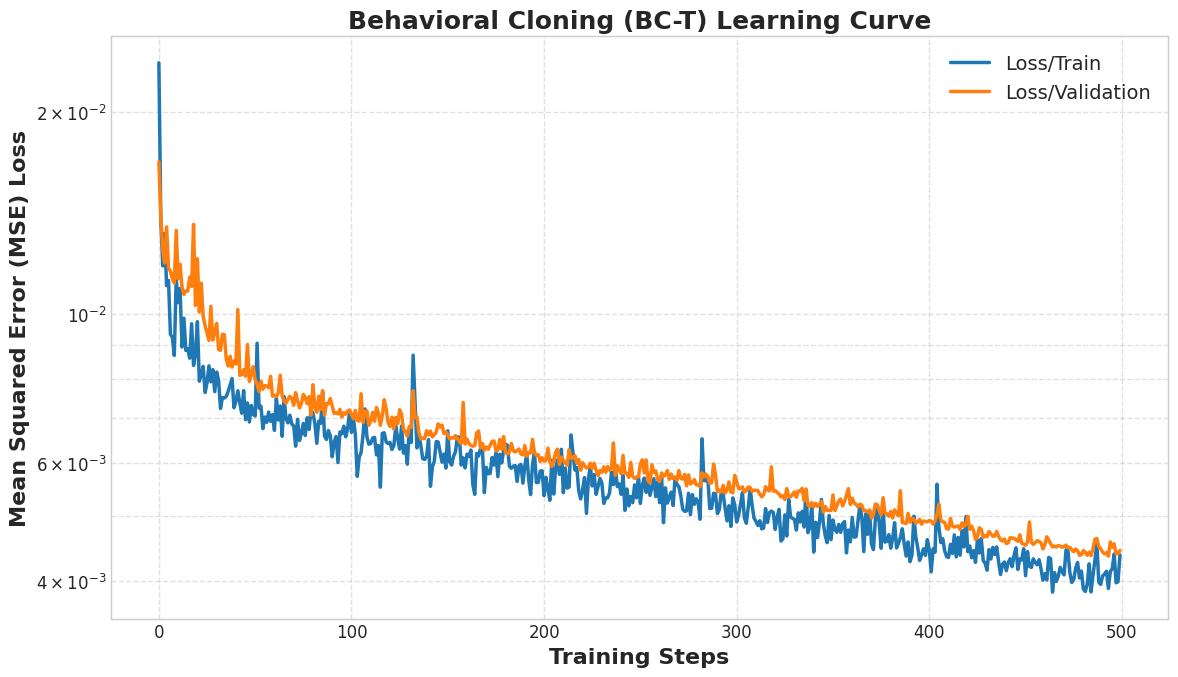

In [28]:
# --- Plot BC-T Training (Aesthetic Version) ---
plt.figure(figsize=(12, 7))

# Use seaborn's lineplot for a clean look with automatic confidence intervals if data is noisy
# We can use our custom palette here.
ax = sns.lineplot(data=df_bc, x='step', y='value', hue='tag', palette=[PALETTE["Train Loss"], PALETTE["Validation Loss"]], lw=2.5)

ax.set_title('Behavioral Cloning (BC-T) Learning Curve')
ax.set_xlabel('Training Steps')
ax.set_ylabel('Mean Squared Error (MSE) Loss')
ax.legend(title='') # Remove the legend title for a cleaner look
ax.grid(True, which='both', linestyle='--')
ax.set_yscale('log') # Log scale is essential for loss curves
plt.tight_layout()

# Save the figure with high DPI for publication quality
output_file = os.path.join(OUTPUT_DIR, 'bc_training_curve_aesthetic.pdf')
plt.savefig(output_file, format='pdf', bbox_inches='tight', dpi=300)
print(f"BC-T plot saved to: {output_file}")

plt.show()

In [24]:
# --- Load CQL Data ---
cql_run_path = os.path.join(RUNS_DIR, CQL_RUN_ID)
cql_tags_to_load = [
    'Loss/Critic_Loss',
    'Loss/Actor_Loss',
    'Parameters/Alpha',
    'CQL/CQL_Term_Q1'
]

print(f"Loading data for CQL run: {CQL_RUN_ID}")
df_cql = load_tensorboard_data(cql_run_path, cql_tags_to_load)

print("CQL data loaded successfully.")
df_cql.head()

Loading data for CQL run: CQL_MLP_2025-08-07_07-50-00_lr3e-05_gamma0.95_cqlalpha10.0
Loading events from: /home/anton/WaymoOfflineAgent/runs/CQL_MLP_2025-08-07_07-50-00_lr3e-05_gamma0.95_cqlalpha10.0
CQL data loaded successfully.


,step,tag,value
0,49,Loss/Critic_Loss,71.479828
1,99,Loss/Critic_Loss,63.684116
2,149,Loss/Critic_Loss,59.725327
3,199,Loss/Critic_Loss,58.586655
4,265,Loss/Critic_Loss,57.644447


CQL plot saved to: /home/anton/WaymoOfflineAgent/outputs/paper_figures/cql_training_curves_aesthetic.pdf


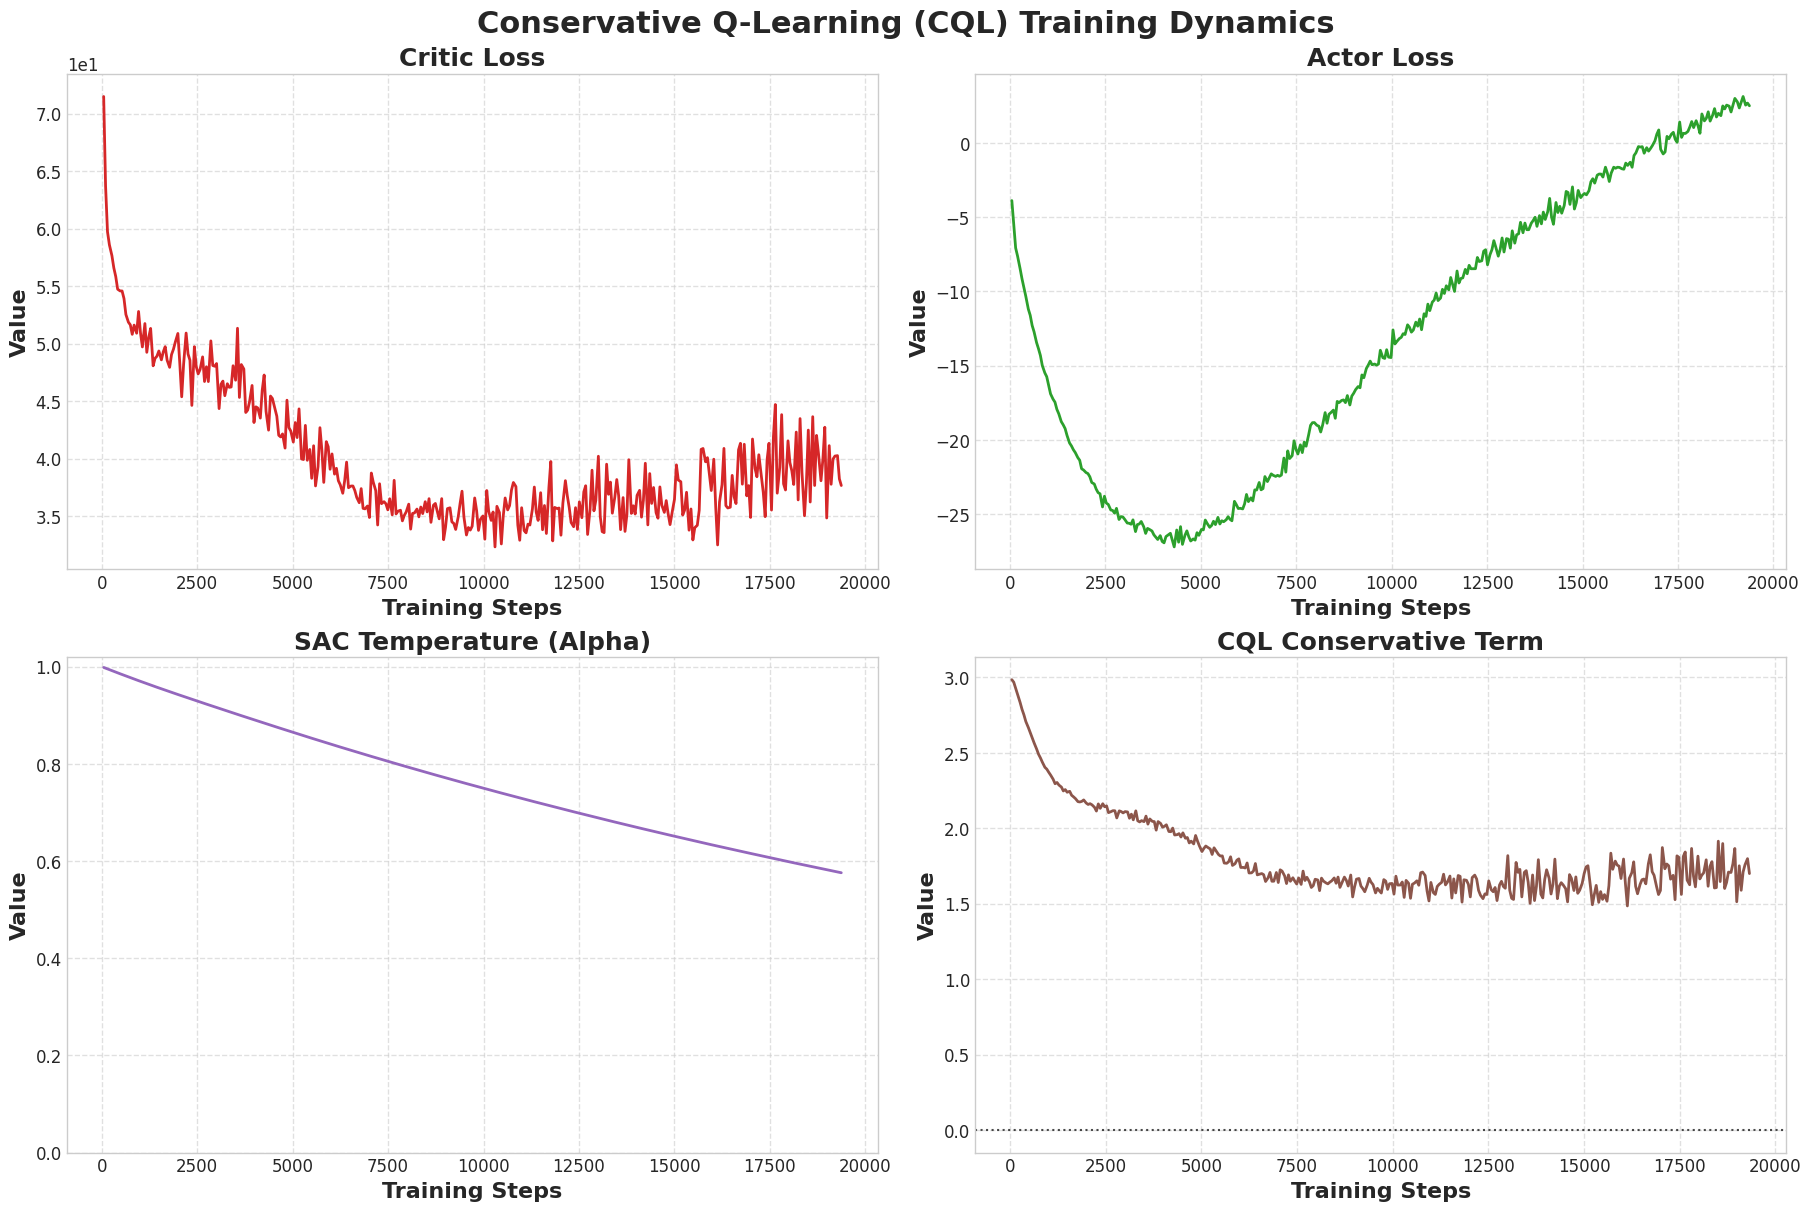

In [29]:
# --- Plot CQL Training (Aesthetic Version) ---

# Create a figure with 2x2 subplots using a constrained layout for better spacing
fig, axes = plt.subplots(2, 2, figsize=(18, 12), constrained_layout=True)
fig.suptitle('Conservative Q-Learning (CQL) Training Dynamics', fontsize=22, fontweight='bold')

# Helper function for consistent styling
def style_ax(ax, title):
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Training Steps')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

# --- Panel 1: Critic Loss ---
ax = axes[0, 0]
sns.lineplot(data=df_cql[df_cql['tag'] == 'Loss/Critic_Loss'], x='step', y='value', ax=ax, color=PALETTE["Critic Loss"], lw=2)
style_ax(ax, 'Critic Loss')
# Use scientific notation for large y-axis values
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# --- Panel 2: Actor Loss ---
ax = axes[0, 1]
sns.lineplot(data=df_cql[df_cql['tag'] == 'Loss/Actor_Loss'], x='step', y='value', ax=ax, color=PALETTE["Actor Loss"], lw=2)
style_ax(ax, 'Actor Loss')

# --- Panel 3: Alpha (Temperature) ---
ax = axes[1, 0]
sns.lineplot(data=df_cql[df_cql['tag'] == 'Parameters/Alpha'], x='step', y='value', ax=ax, color=PALETTE["Alpha"], lw=2)
style_ax(ax, 'SAC Temperature (Alpha)')
# Set a specific y-limit to better see the convergence
ax.set_ylim(bottom=0)

# --- Panel 4: CQL Term ---
ax = axes[1, 1]
sns.lineplot(data=df_cql[df_cql['tag'] == 'CQL/CQL_Term_Q1'], x='step', y='value', ax=ax, color=PALETTE["CQL Term"], lw=2)
style_ax(ax, 'CQL Conservative Term')
# Add a horizontal line at y=0 for reference
ax.axhline(0, color='black', linestyle=':', linewidth=1.5, alpha=0.7)

# Save the figure
output_file = os.path.join(OUTPUT_DIR, 'cql_training_curves_aesthetic.pdf')
plt.savefig(output_file, format='pdf', bbox_inches='tight', dpi=300)
print(f"CQL plot saved to: {output_file}")

plt.show()